# **Employee Attrition Prediction**

## **Import Libraries**

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


## **Load Data and Clean Data**

In [20]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [21]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [23]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [24]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing[missing > 0])

Missing Values:
 Series([], dtype: int64)


In [25]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [26]:
# Check column types
print("\nColumn Types:\n", df.dtypes)


Column Types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
Tota

In [27]:
# Drop irrelevant columns (like 'EmployeeCount', 'Over18', 'StandardHours' — all have constant values)
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
df.drop(columns=drop_cols, inplace=True)

## **Exploratory Data Analysis (EDA)**

In [49]:
# 1. How many employees are there in the dataset? How many left the company?

attrition_counts = df['Attrition'].value_counts().reset_index()
attrition_counts.columns = ['Attrition', 'Count']

print(f"Total Employees: {total_employees}")
print(attrition_counts)

Total Employees: 1470
  Attrition  Count
0        No   1233
1       Yes    237


In [29]:
# 2. What is the average age of employees who left vs. stayed?

df.groupby('Attrition')['Age'].mean()

,Age
Attrition,
No,37.561233
Yes,33.607595


In [30]:
# 3. What is the attrition rate across departments?

dept_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100
dept_attrition

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


In [31]:
# 4. Is there any correlation between distance from home and attrition?

df[['DistanceFromHome', 'Attrition']].groupby('Attrition').mean()

,DistanceFromHome
Attrition,
No,8.915653
Yes,10.632911


In [14]:
# 5. What is the relationship between overtime and attrition?

overtime_attrition = df.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack()
overtime_attrition

Attrition,No,Yes
OverTime,,
No,0.895636,0.104364
Yes,0.694712,0.305288


In [32]:
# 6. How does monthly income impact attrition?

df[['MonthlyIncome', 'Attrition']].groupby('Attrition').mean()


,MonthlyIncome
Attrition,
No,6832.739659
Yes,4787.092827


In [33]:
# 7. Which features have the most missing values (if any)?

df.isnull().sum().sort_values(ascending=False)

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


## **Visualizations**

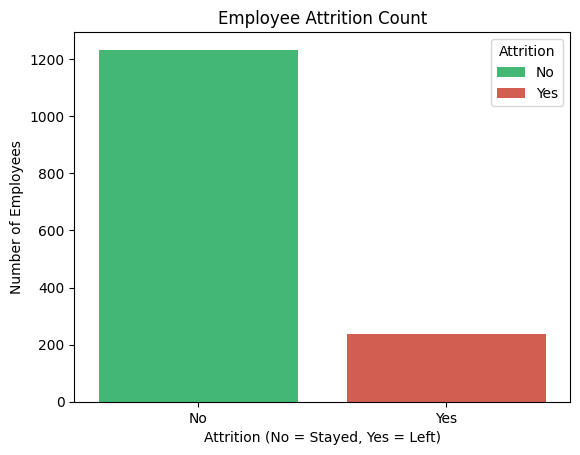

In [50]:
# 1. Bar chart: Count of employees by Attrition

sns.barplot(x='Attrition', y='Count', data=attrition_counts, hue='Attrition',
            palette={'Yes': '#e74c3c', 'No': '#2ecc71'}, legend=True)

plt.title("Employee Attrition Count")
plt.xlabel("Attrition (No = Stayed, Yes = Left)")
plt.ylabel("Number of Employees")
plt.show()

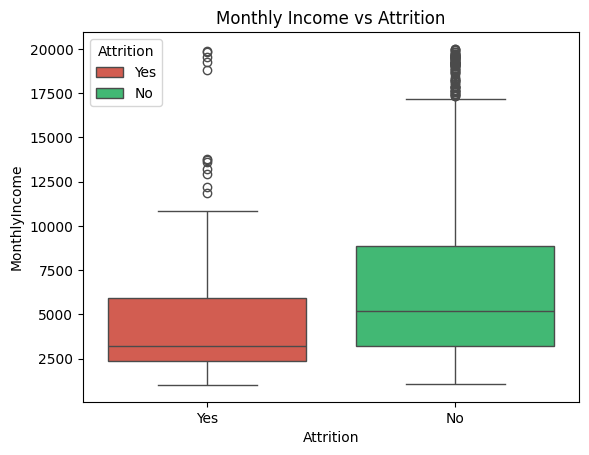

In [35]:
# 2. Boxplot: MonthlyIncome vs Attrition

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, hue='Attrition', palette={'Yes': '#e74c3c', 'No': '#2ecc71'}, legend=True)
plt.title("Monthly Income vs Attrition")
plt.show()

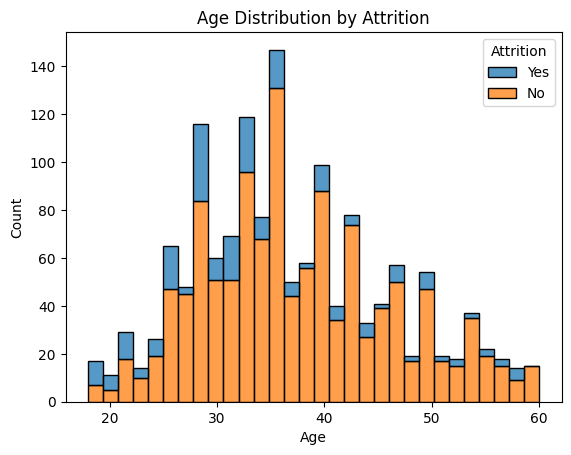

In [38]:
# 3. Histogram: Age distribution by Attrition

sns.histplot(data=df, x="Age", hue="Attrition", multiple="stack", bins=30)
plt.title("Age Distribution by Attrition")
plt.show()

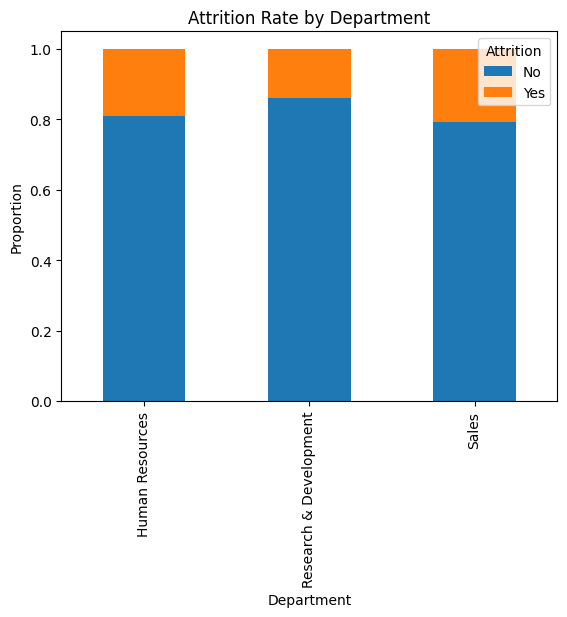

In [39]:
# 4. Stacked bar chart: Department vs Attrition

pd.crosstab(df['Department'], df['Attrition'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Attrition Rate by Department")
plt.ylabel("Proportion")
plt.show()

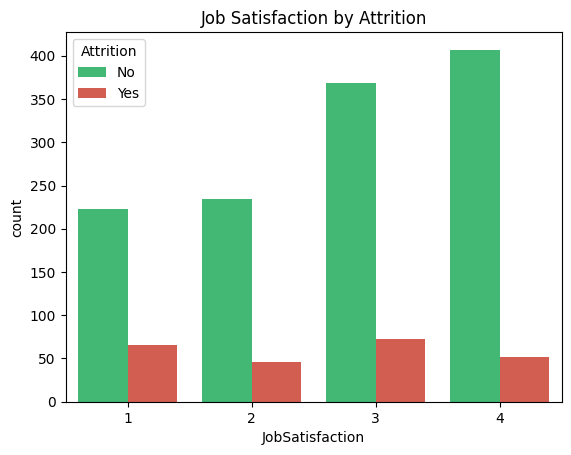

In [40]:
# 5. Countplot: JobSatisfaction by Attrition

sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette={'Yes': '#e74c3c', 'No': '#2ecc71'}, legend=True)
plt.title("Job Satisfaction by Attrition")
plt.show()

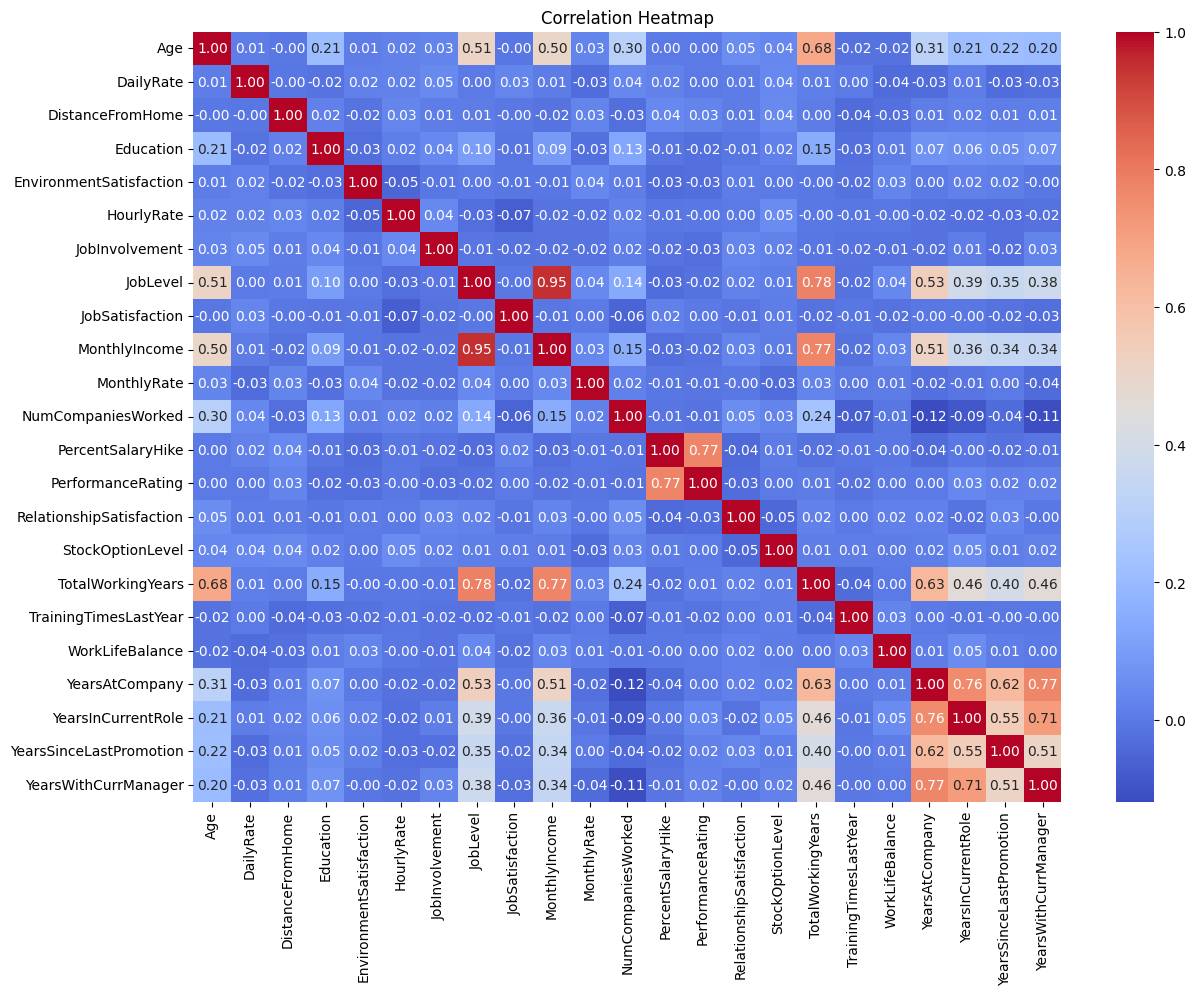

In [52]:
# 6. Heatmap: Correlation between numerical variables

corr = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))  # Bigger plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## **Machine Learning Model Training**

In [42]:
# Encode categorical variables (OneHotEncoding).

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition'].map({'Yes': 1, 'No': 0})  # Convert to binary

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

In [43]:
# Train/Test Split (80/20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Train Models

# Logistic Regression

# Assuming your original preprocessor looks something like this:

numeric_features = selector(dtype_include='number')(X_train)
categorical_features = selector(dtype_include='object')(X_train)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # 🔹 Added scaling
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# ✅ Now create the fixed pipeline
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Fit the model
logreg_pipeline.fit(X_train, y_train)

# Logistic Regression

# logreg_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(max_iter=1000))
# ])

# logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike'...
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [45]:
# Random Forest

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike'...
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [46]:
# Evaluation

# Logistic Regression Evaluation
y_pred_logreg = logreg_pipeline.predict(X_test)
y_proba_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, y_proba_logreg))

# Random Forest Evaluation
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("\n🔹 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))


🔹 Logistic Regression
Accuracy: 0.8945578231292517
Confusion Matrix:
 [[245  10]
 [ 21  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       255
           1       0.64      0.46      0.54        39

    accuracy                           0.89       294
   macro avg       0.78      0.71      0.74       294
weighted avg       0.88      0.89      0.89       294

ROC AUC: 0.7945701357466064

🔹 Random Forest
Accuracy: 0.8775510204081632
Confusion Matrix:
 [[253   2]
 [ 34   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.71      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.80      0.56      0.58       294
weighted avg       0.86      0.88      0.84       294

ROC AUC: 0.7415786827551533


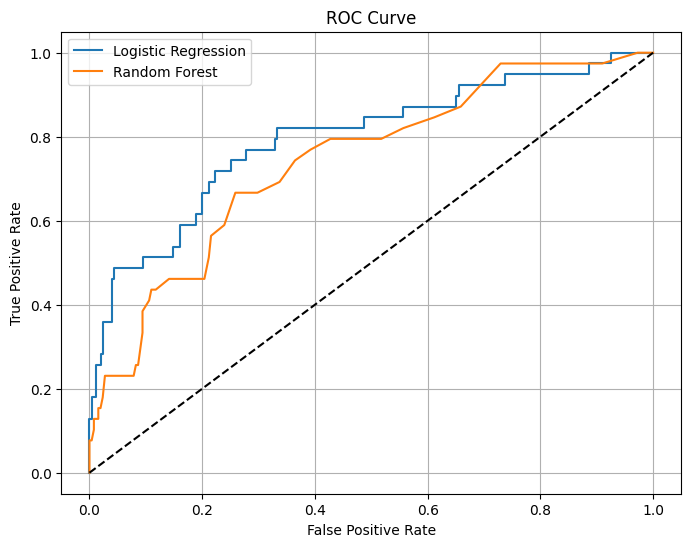

In [47]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()
